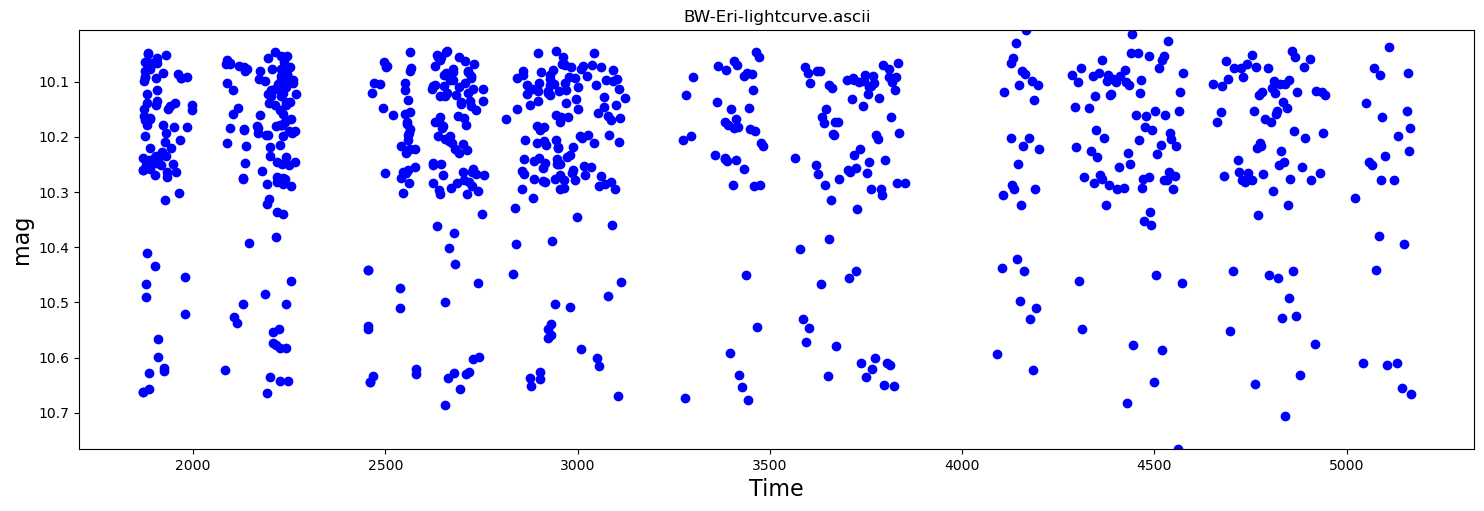

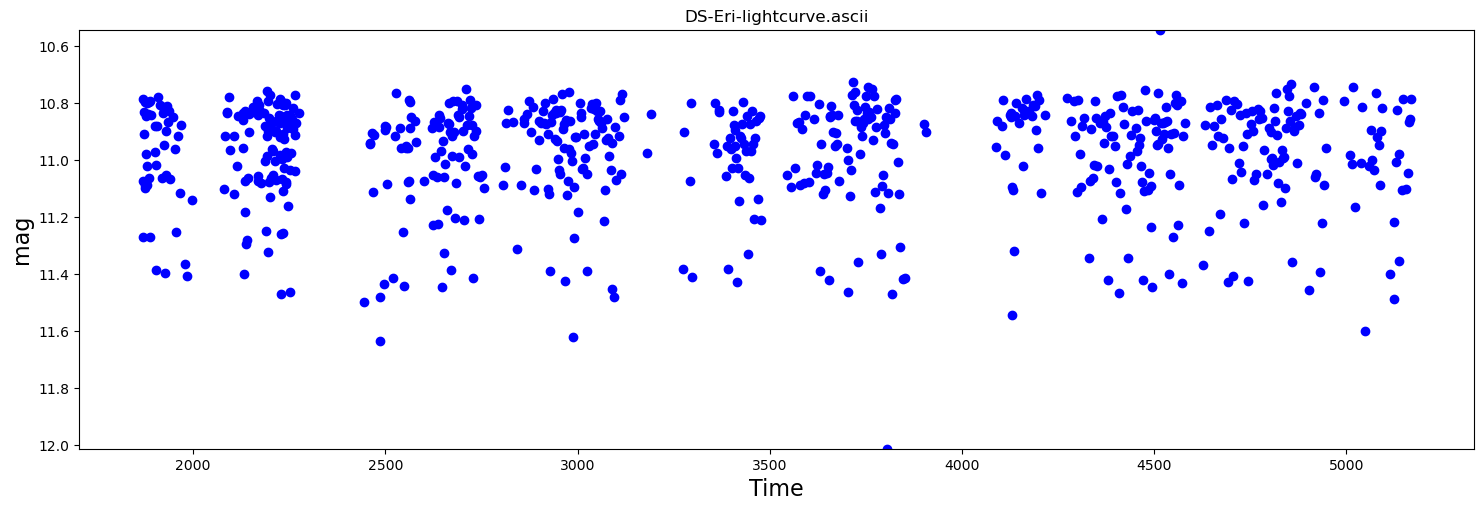

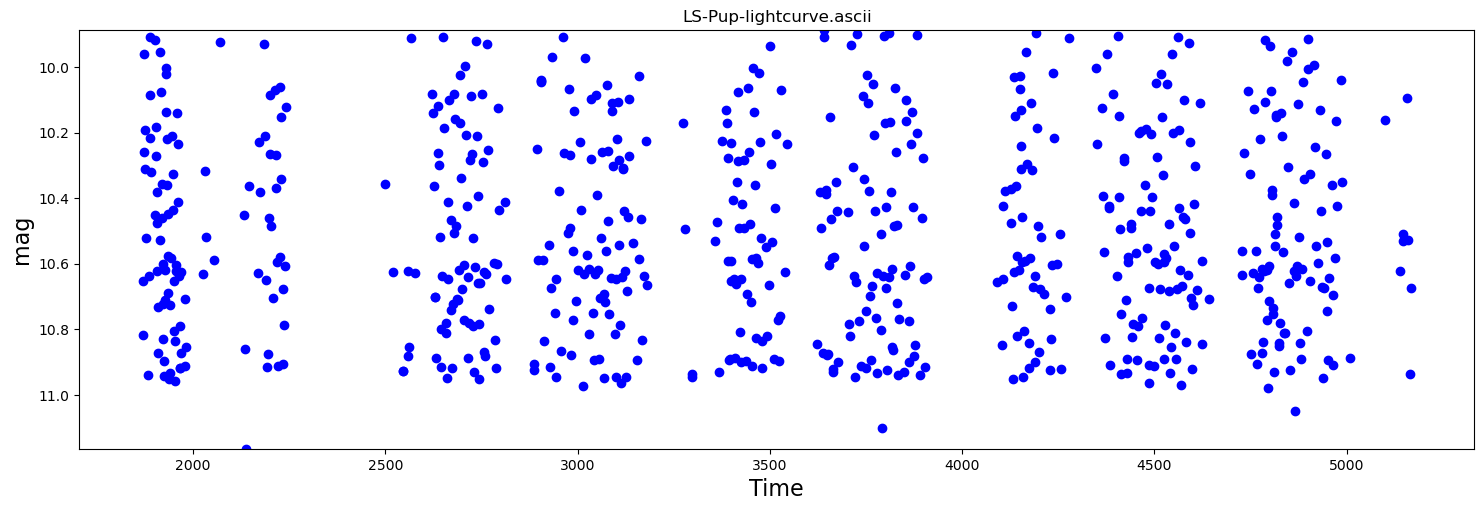

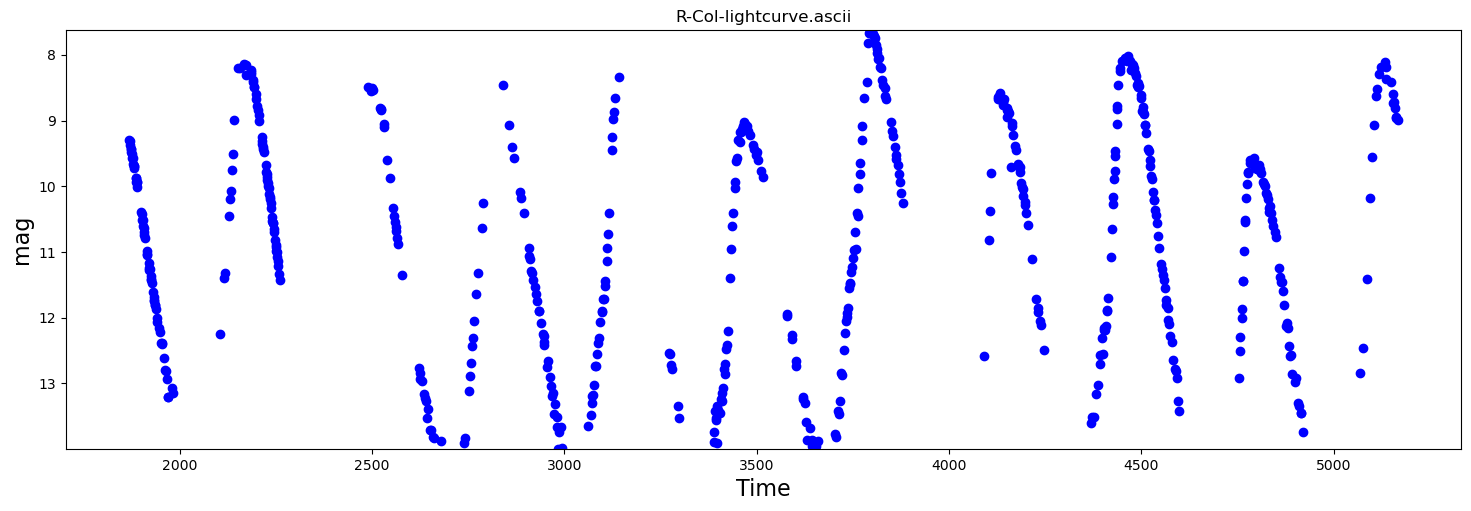

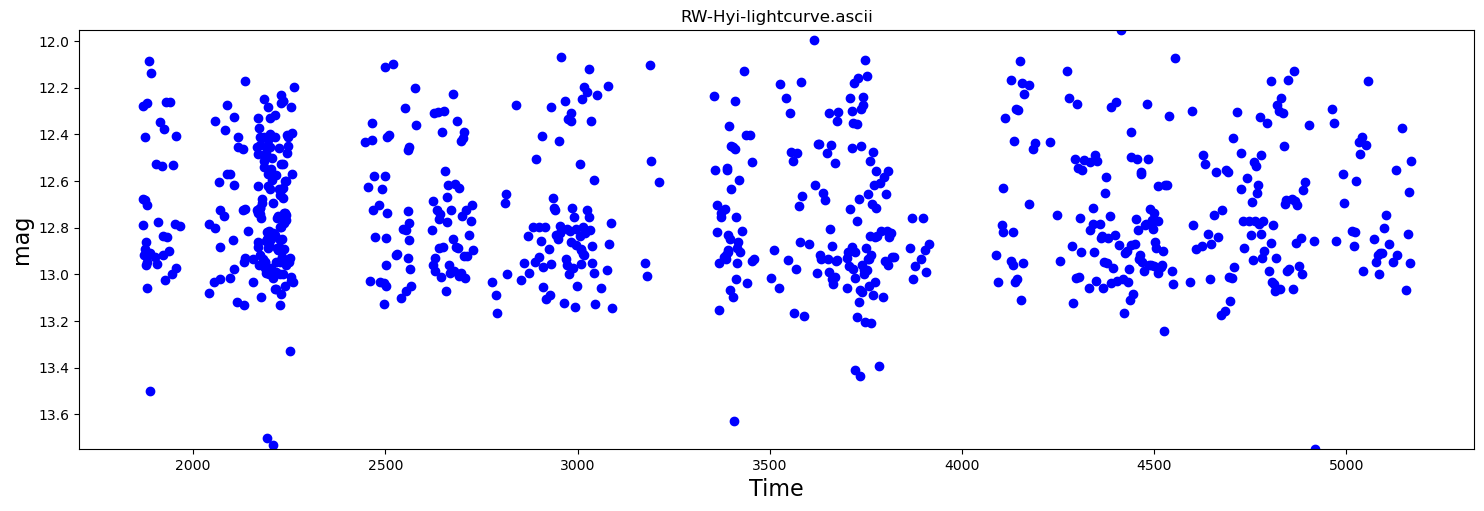

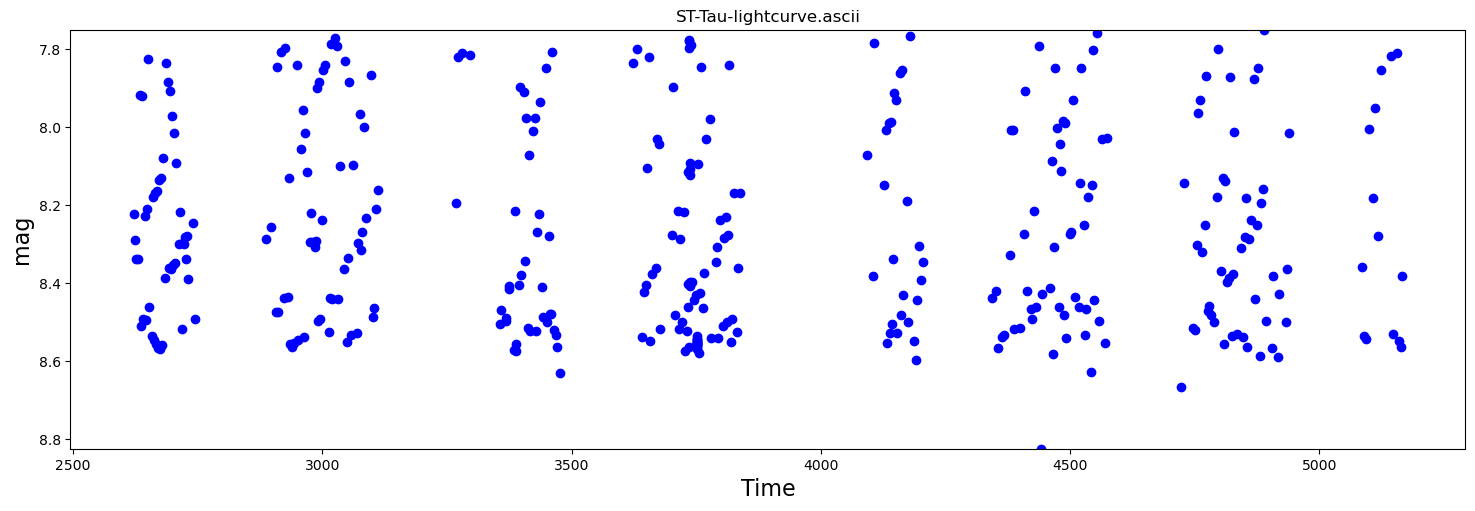

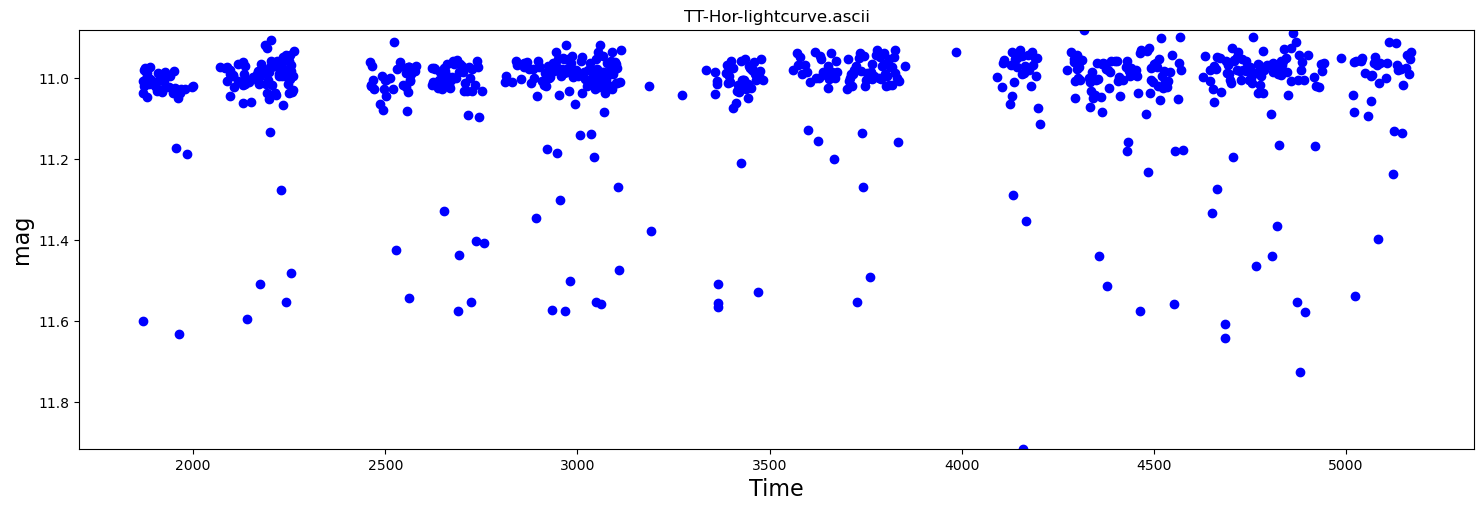

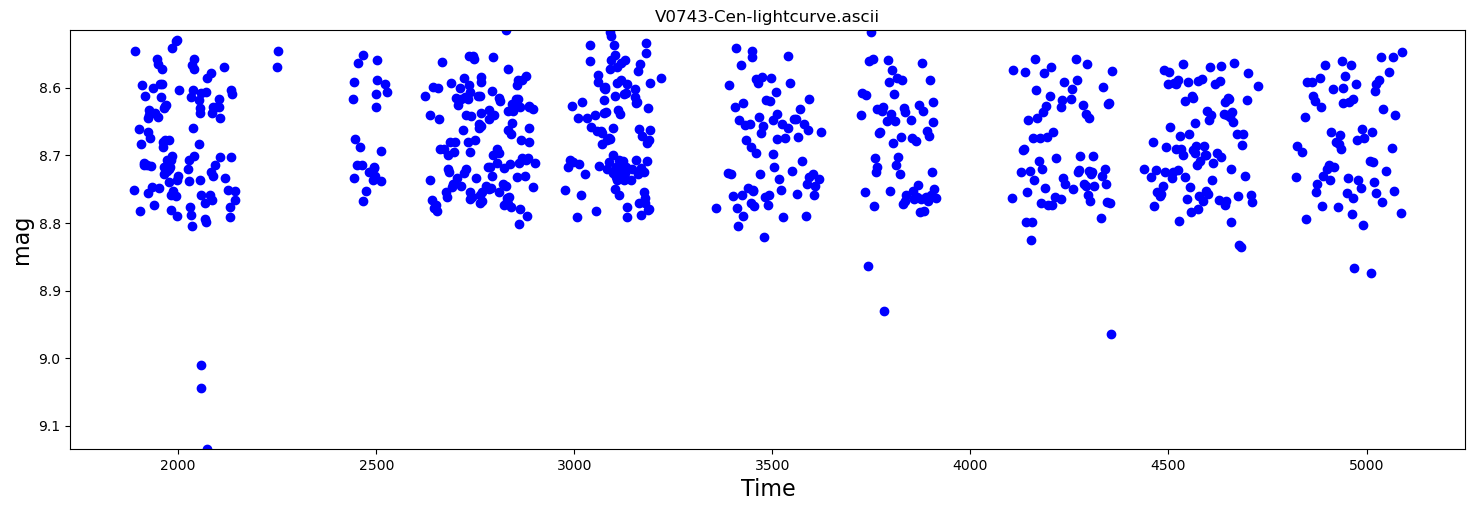

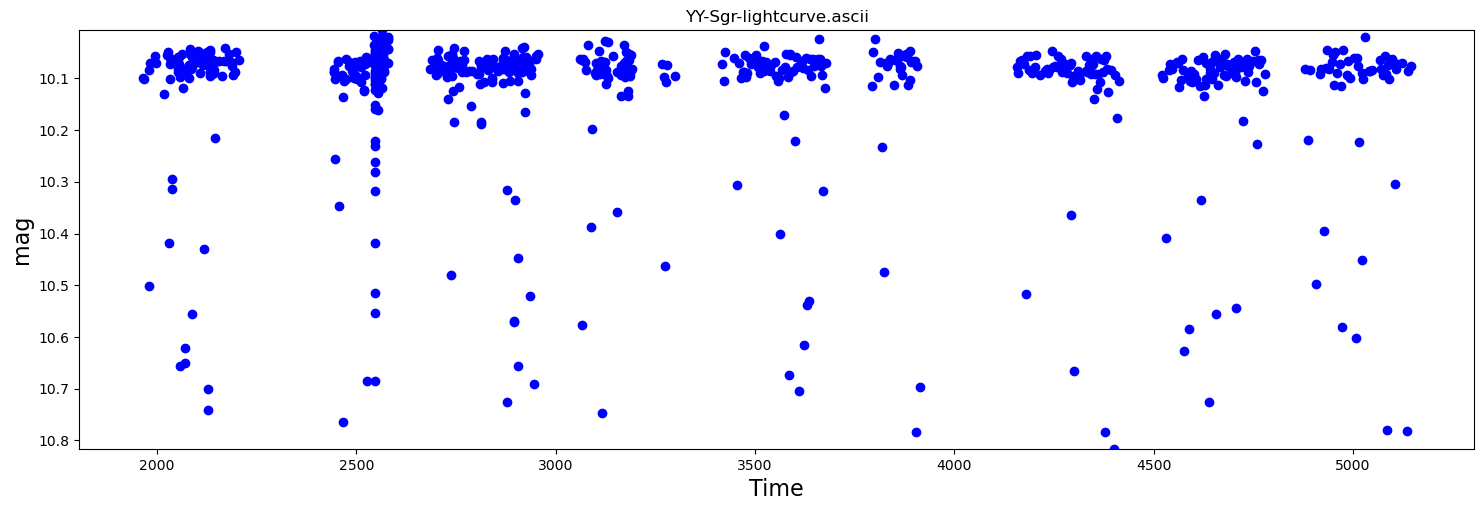

In [41]:
# load the libraries you need
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table

# let's read the lightcurve
def lightcurve(P1):
    mytable = Table.read(P1, format='ascii')
    time = mytable['col1']
    mag = mytable['col2']
    
    # let's clean up to keep only magnitudes < 20
    subset_condition = (mag < 14.0)

    mag_clean = np.extract(subset_condition,mag)
    time_clean = np.extract(subset_condition,time)
    
    #make it a plot:
    fig1, ax = plt.subplots(figsize=(18,6))
    ax.plot(time_clean, mag_clean, color='blue', marker='o', linestyle='none')
    ax.set_ylim(max(mag_clean), min(mag_clean))
    ax.set_title(f"{P1}")
    ax.set_box_aspect(0.3)
    ax.set_xlabel("Time", fontsize=16)
    ax.set_ylabel("mag", fontsize=16)
    fig1.savefig(f"{P1}-LightCurve.png",bbox_inches='tight')
    plt.show()

lightcurve("BW-Eri-lightcurve.ascii")
lightcurve("DS-Eri-lightcurve.ascii")
lightcurve("LS-Pup-lightcurve.ascii")
lightcurve("R-Col-lightcurve.ascii")
lightcurve("RW-Hyi-lightcurve.ascii")
lightcurve("ST-Tau-lightcurve.ascii")
lightcurve("TT-Hor-lightcurve.ascii")
lightcurve("V0743-Cen-lightcurve.ascii")
lightcurve("YY-Sgr-lightcurve.ascii")

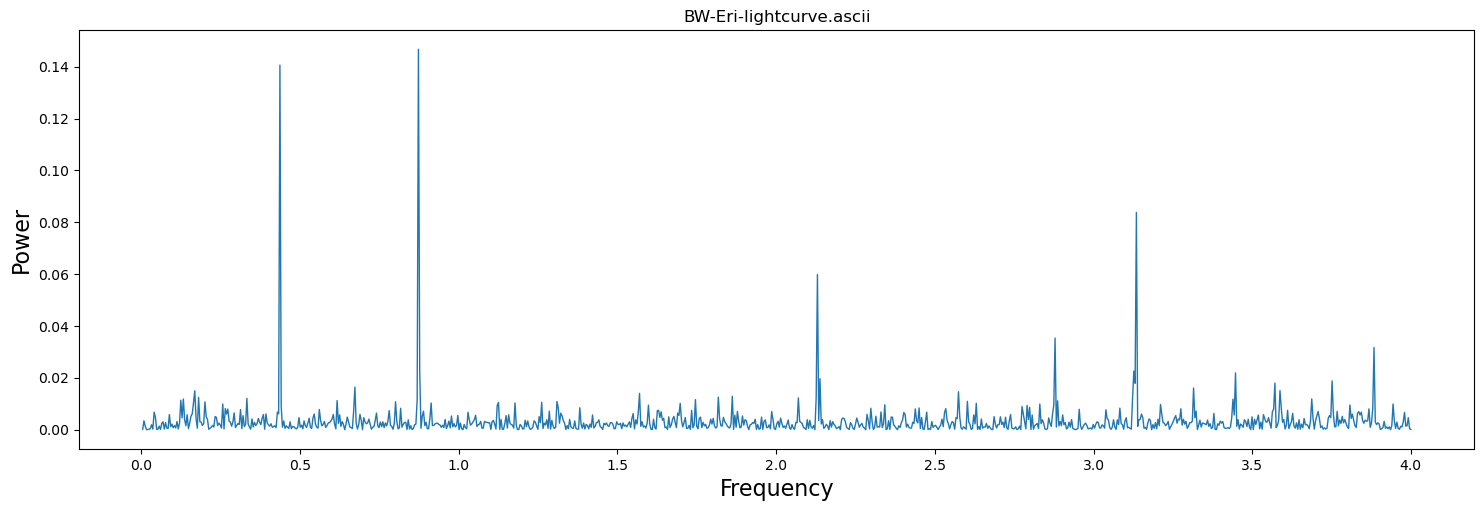

max power: nan, frequency: 0.0
Period: inf


C:\Users\antho\AppData\Local\Temp\ipykernel_28148\2535440238.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  T = 1/f


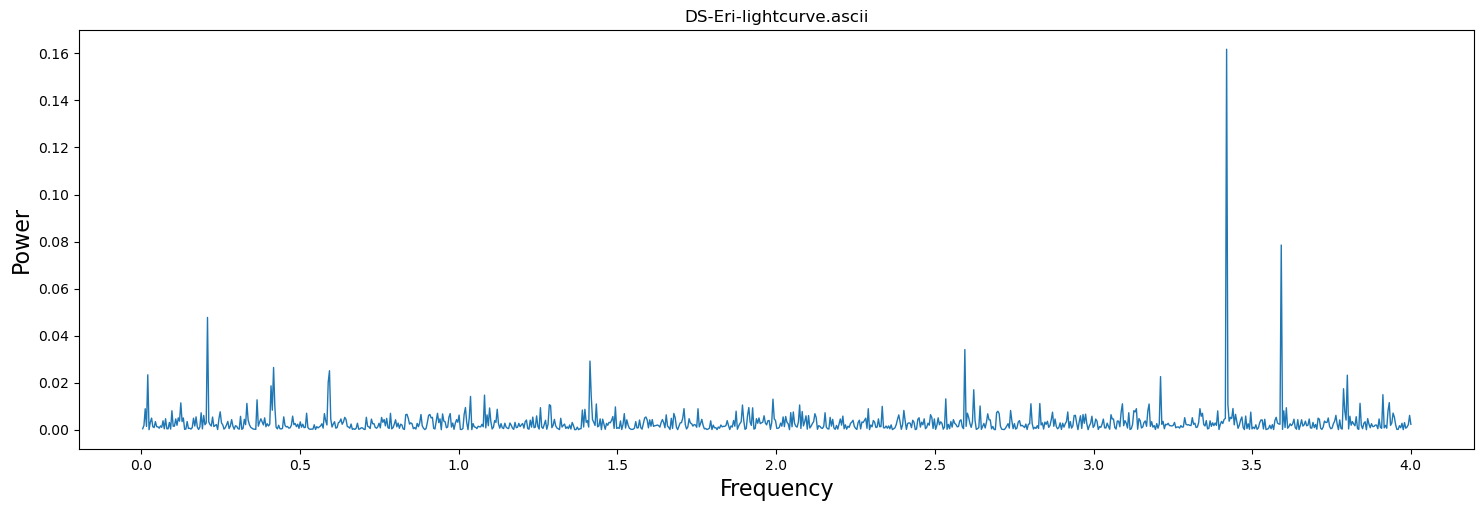

max power: nan, frequency: 0.0
Period: inf


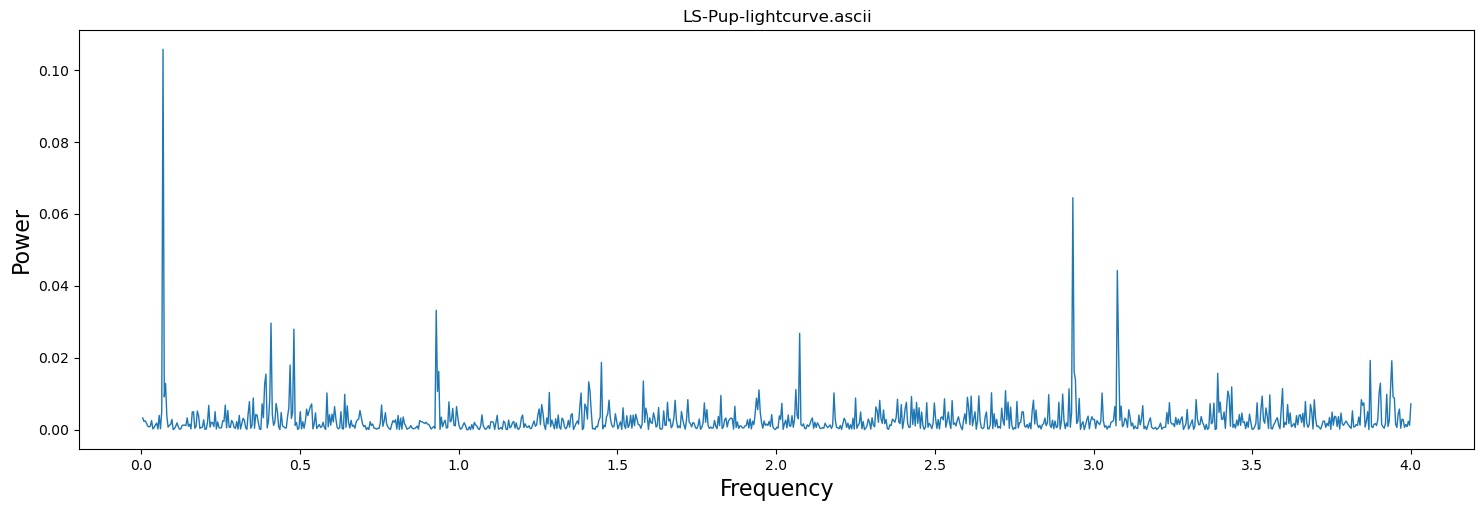

max power: nan, frequency: 0.0
Period: inf


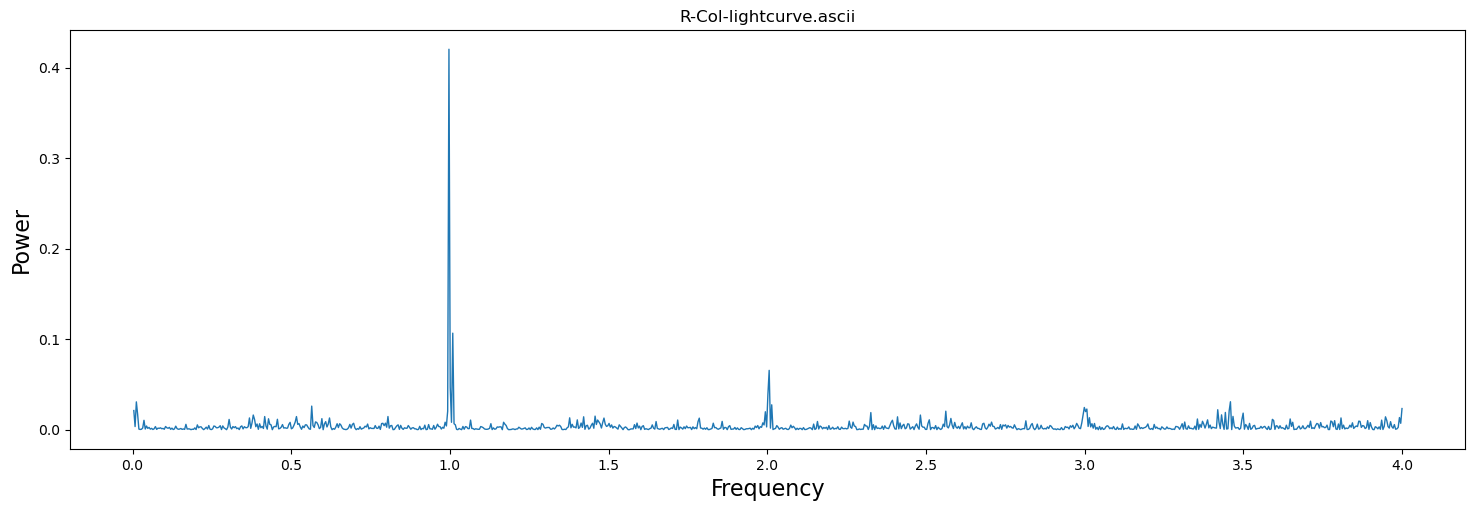

max power: nan, frequency: 0.0
Period: inf


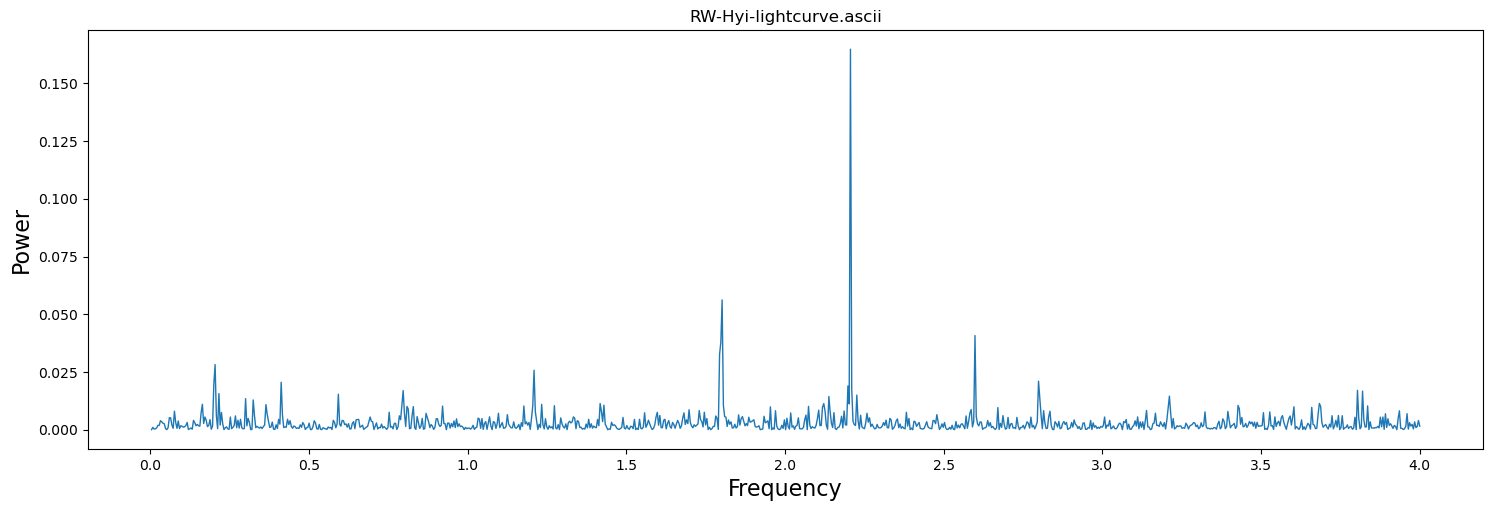

max power: nan, frequency: 0.0
Period: inf


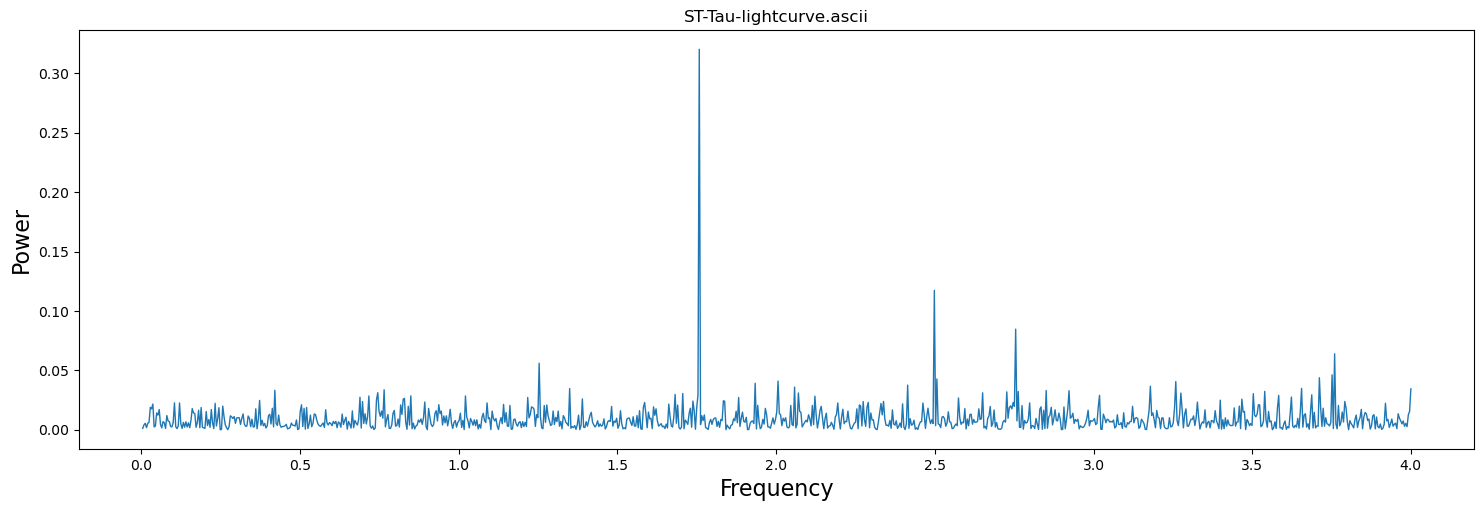

max power: nan, frequency: 0.0
Period: inf


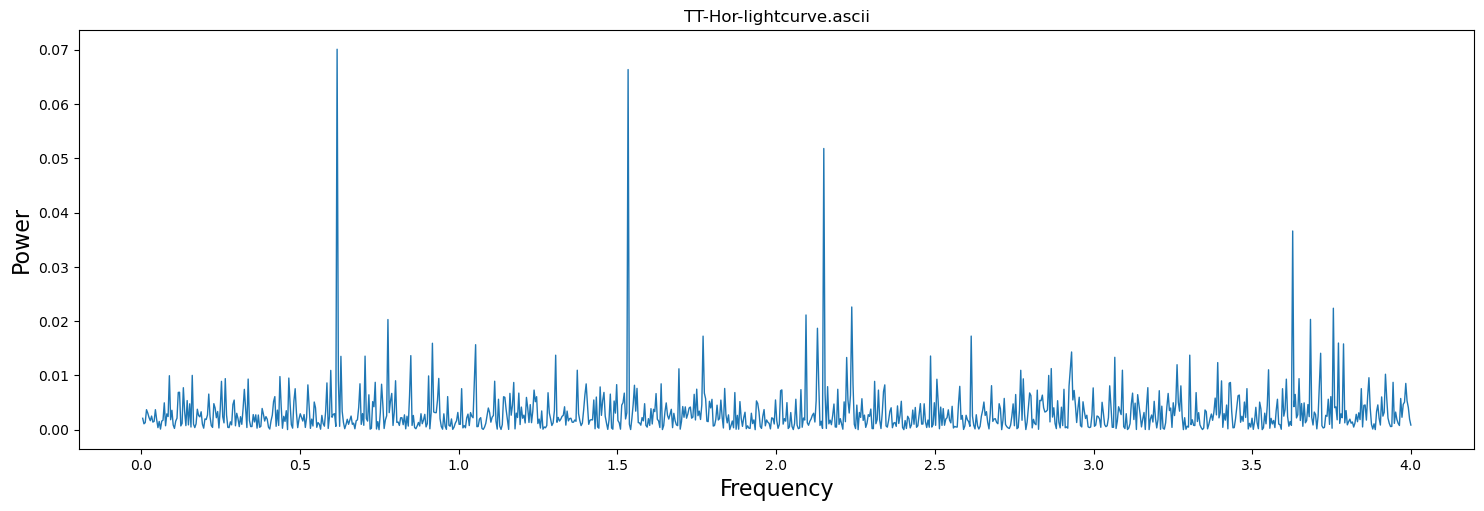

max power: nan, frequency: 0.0
Period: inf


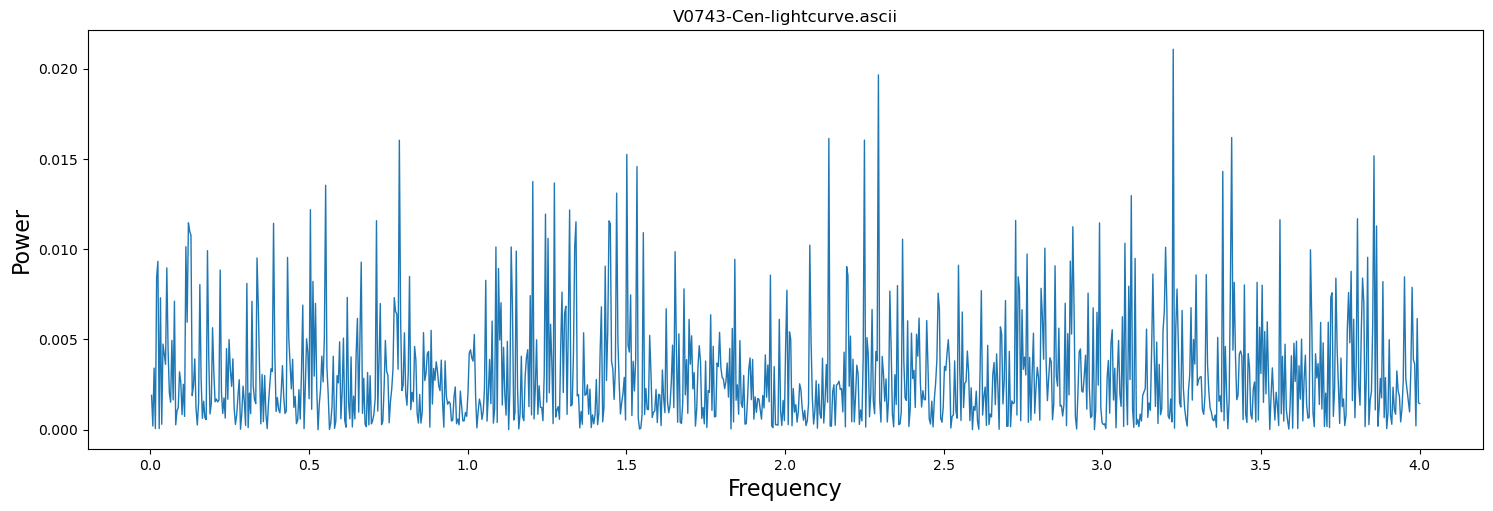

max power: nan, frequency: 0.0
Period: inf


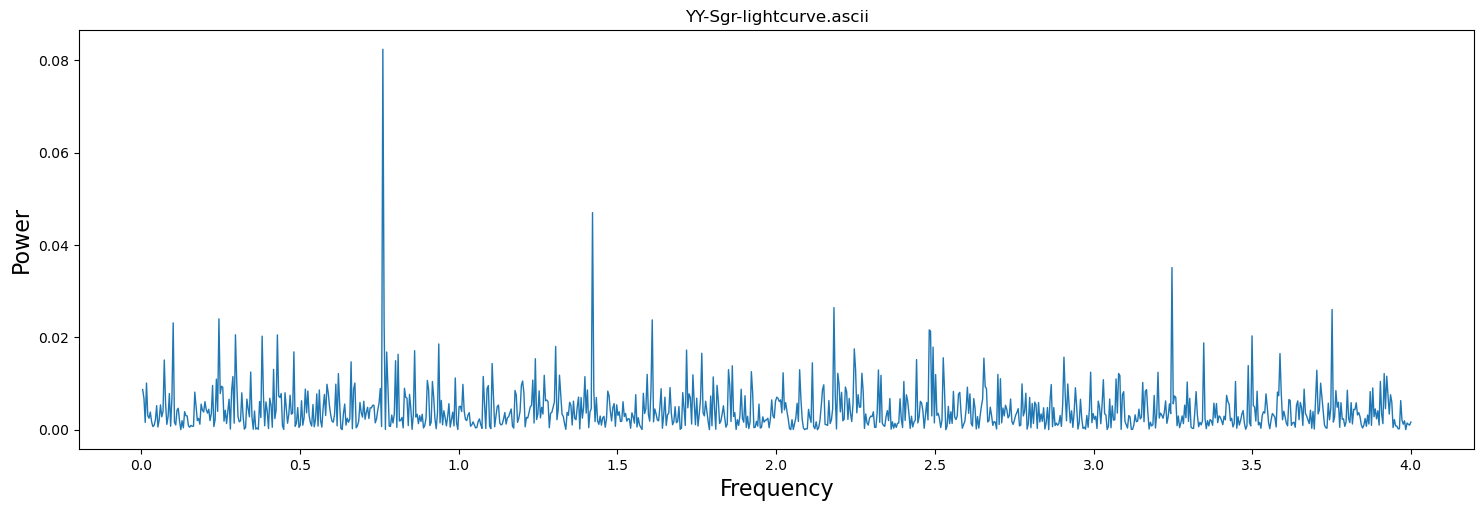

max power: nan, frequency: 0.0
Period: inf


In [30]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.timeseries import LombScargle

def periodogram(P1):
    mytable = Table.read(P1, format='ascii')
    time = mytable['col1']
    mag = mytable['col2']
    
    # let's clean up to keep only magnitudes < 20
    subset_condition = (mag < 14.0)

    mag_clean = np.extract(subset_condition,mag)
    time_clean = np.extract(subset_condition,time)
    
    # let's create a periodogram
    frequency, power = LombScargle(time_clean, mag_clean).autopower()
    frequency = np.linspace(0.0,4,1000)
    power = LombScargle(time_clean, mag_clean).power(frequency)

    # place the periodogram in a table
    array = np.arange(2*len(power)).reshape(len(power), 2)
    perio = Table(array, names=('freq','pow') )
    perio['freq'] = frequency
    perio['pow'] = power

    # write the periodogram in a file
    perio.write('var1_perio.txt',format='ascii',overwrite=True)
    
    #make it a plot:
    fig1, ax = plt.subplots(figsize=(18,6))
    ax.plot(frequency, power, linewidth=1)
    #ax.set_xlim(0.06, 0.1)

    ax.set_box_aspect(0.3)
    ax.set_xlabel("Frequency", fontsize=16)
    ax.set_ylabel("Power", fontsize=16)
    ax.set_title(P1)
    #fig1.savefig(f"{P1}-periodogram.png",bbox_inches='tight')
    plt.show()
    
    max_p = max(power)
    f = frequency[power.argmax()]
    print(f"max power: {max_p}, frequency: {f}")
    T = 1/f
    print(f"Period: {T}")
    
periodogram("BW-Eri-lightcurve.ascii")
periodogram("DS-Eri-lightcurve.ascii")
periodogram("LS-Pup-lightcurve.ascii")
periodogram("R-Col-lightcurve.ascii")
periodogram("RW-Hyi-lightcurve.ascii")
periodogram("ST-Tau-lightcurve.ascii")
periodogram("TT-Hor-lightcurve.ascii")
periodogram("V0743-Cen-lightcurve.ascii")
periodogram("YY-Sgr-lightcurve.ascii")

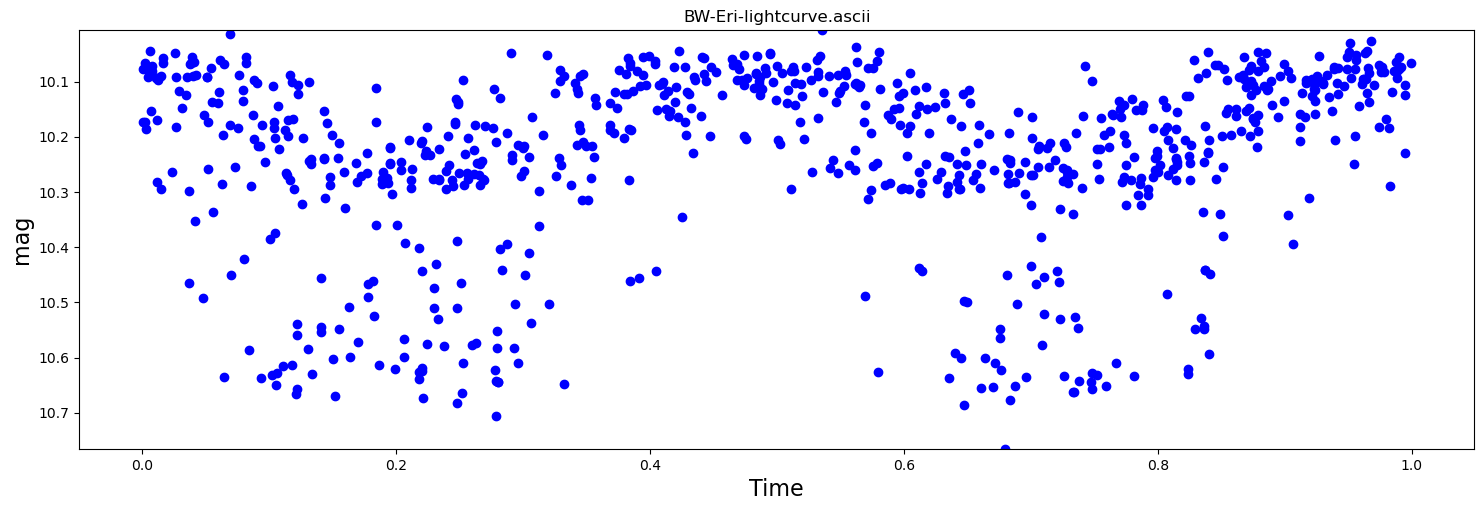

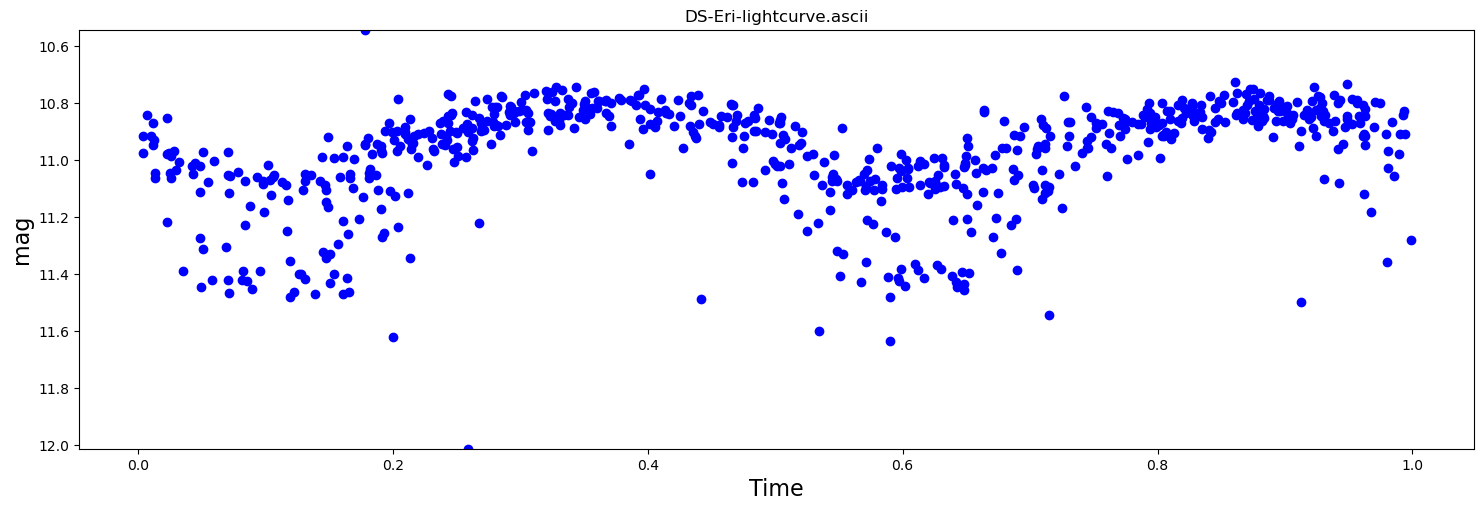

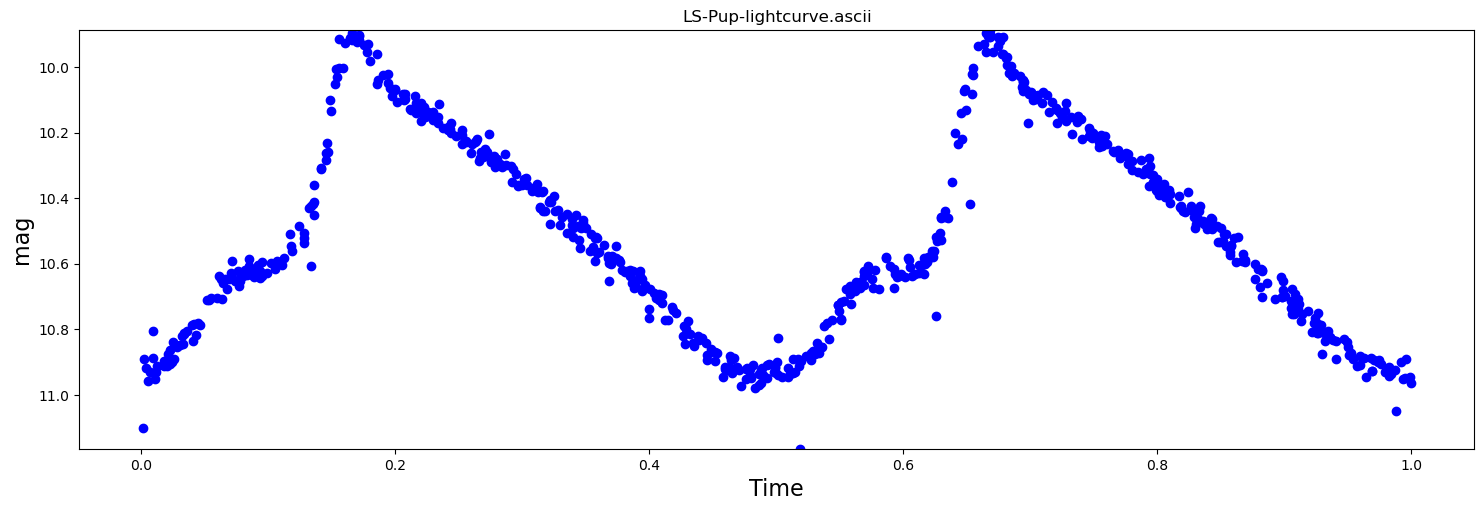

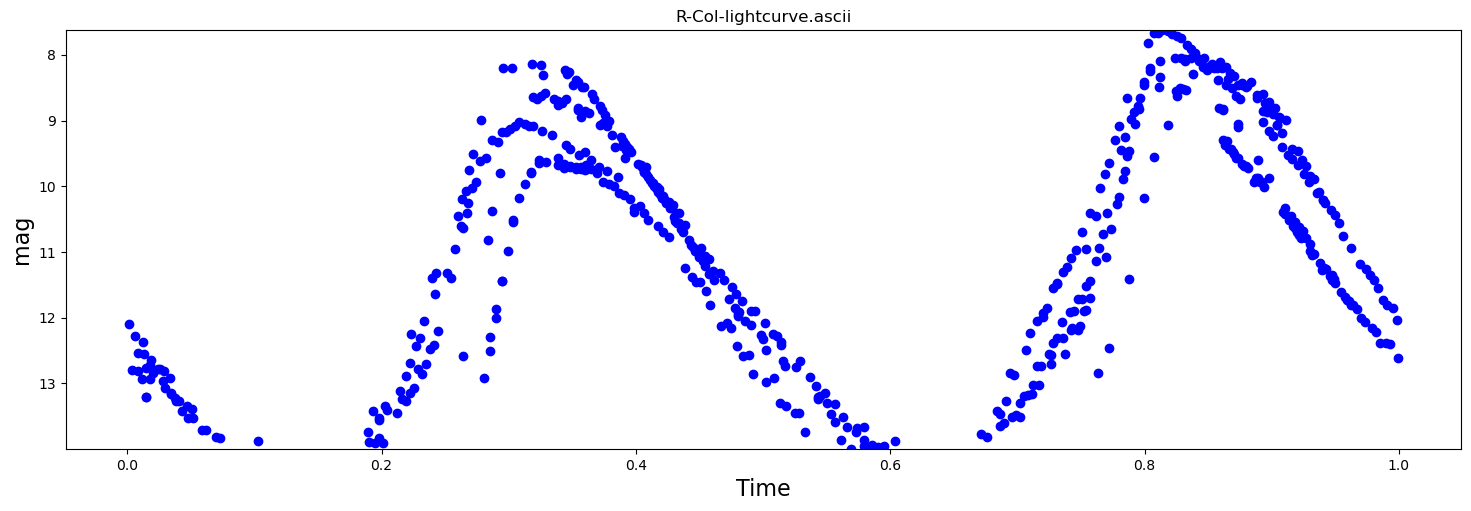

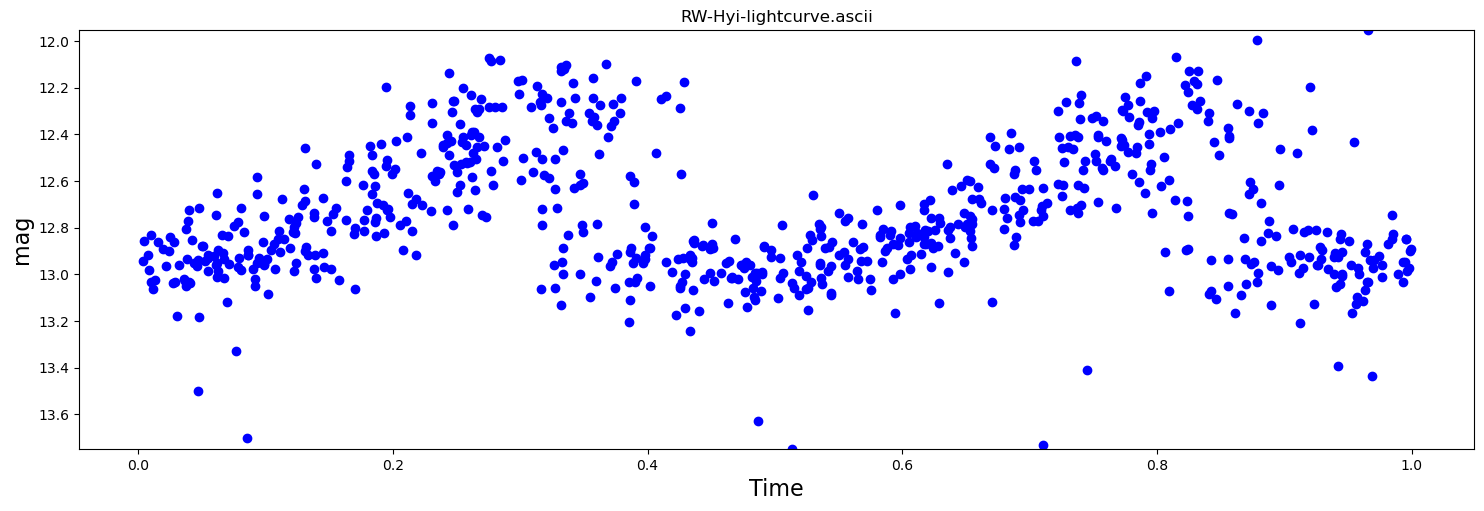

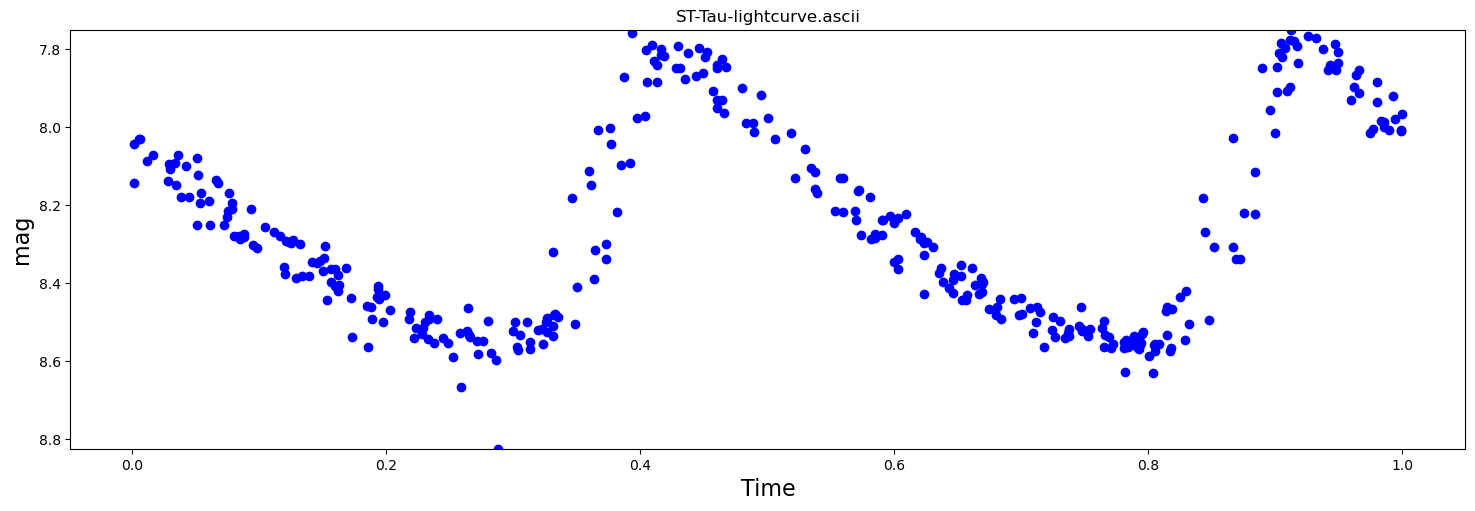

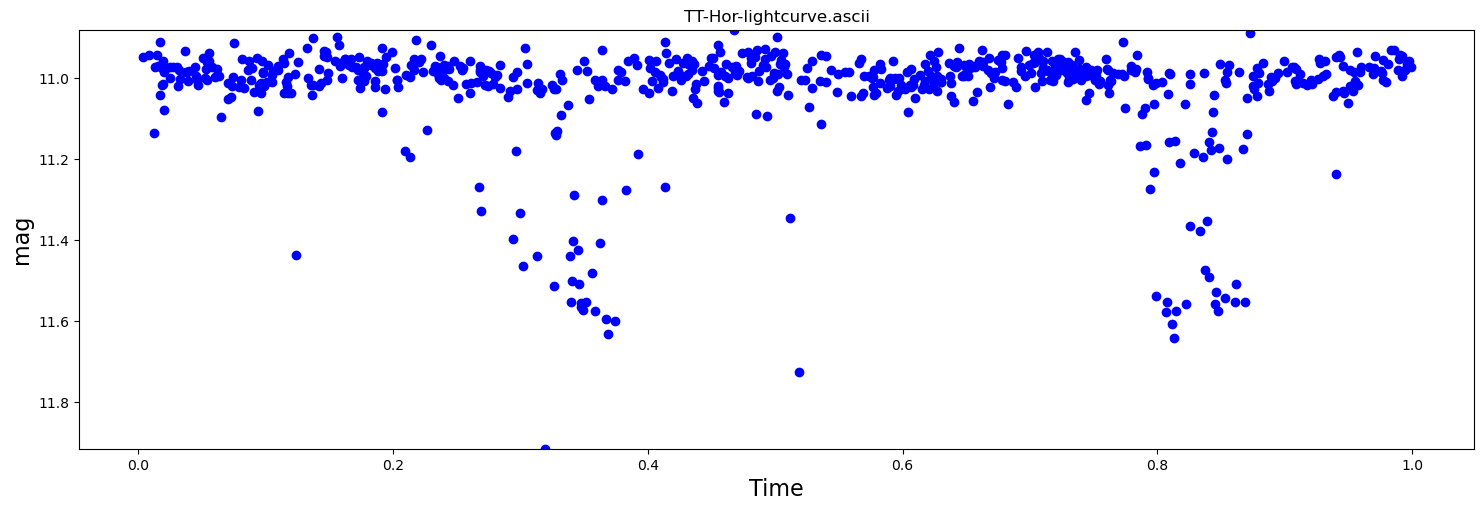

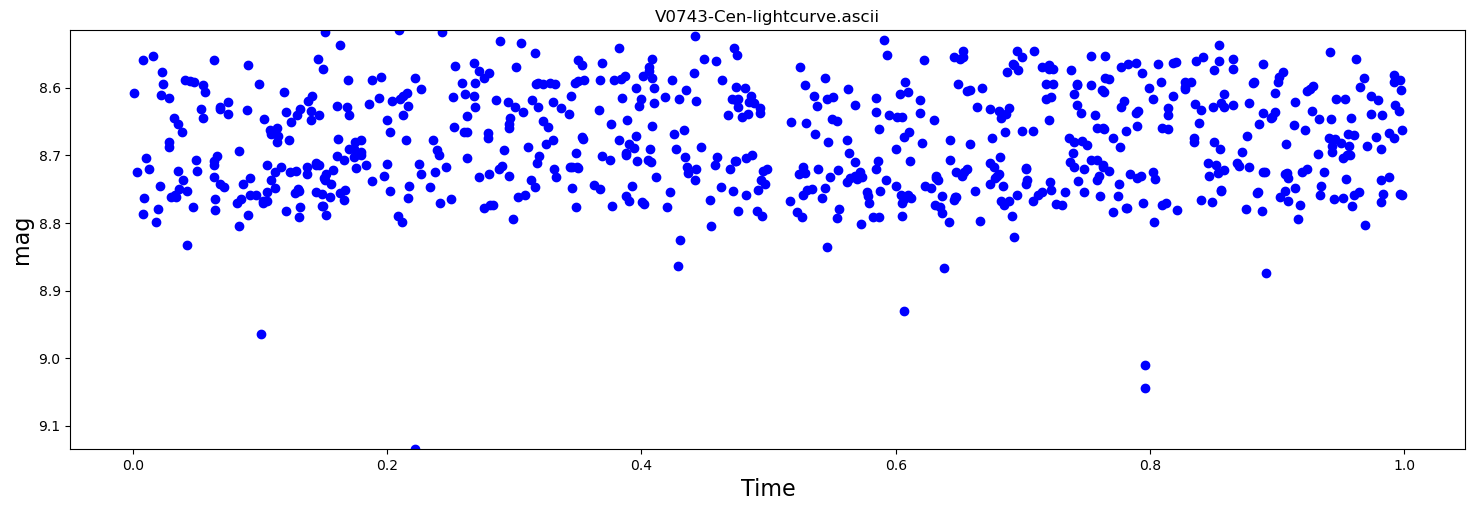

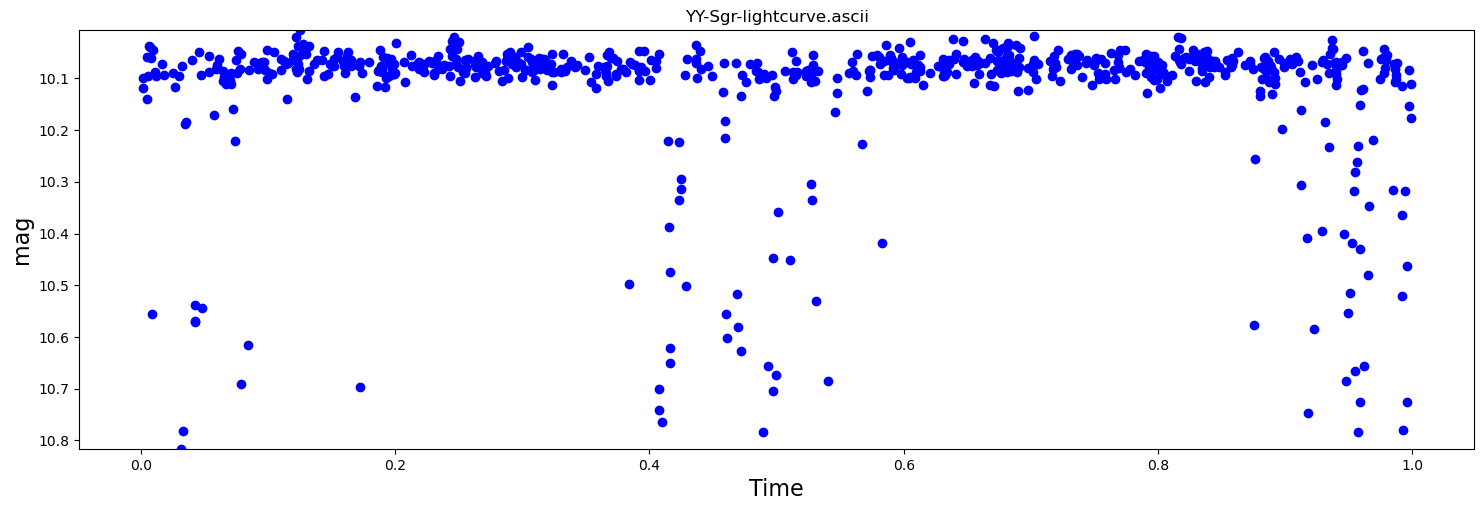

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.timeseries import LombScargle

def phasecurve(P1):
    mytable = Table.read(P1, format='ascii')
    time = mytable['col1']
    mag = mytable['col2']
    
    # let's clean up to keep only magnitudes < 20
    subset_condition = (mag < 14.0)

    mag_clean = np.extract(subset_condition,mag)
    time_clean = np.extract(subset_condition,time)
    
    frequency, power = LombScargle(time_clean, mag_clean).autopower()
    
    # calculating the phase
    max_p = max(power)
    f = frequency[power.argmax()]
    T = 1/f
    phase = time_clean / T
    phase = phase - np.floor(phase)

    # create a table with phase values
    array = np.arange(2*len(phase)).reshape(len(phase), 2)
    folded_lc = Table(array, names=('phase','mag') )
    folded_lc['phase'] = phase
    folded_lc['mag'] = mag_clean

    # writing this new table into a file
    folded_lc.write('var1_folded_lc.txt',format='ascii',overwrite=True)
    
    # calculating the phase
    phase = time_clean / (T * 2.0)
    phase = phase - np.floor(phase)

    #make it a plot:
    fig1, ax = plt.subplots(figsize=(18,6))
    ax.plot(phase, mag_clean, color='blue', marker='o', linestyle='none')
    ax.set_ylim(max(mag_clean),min(mag_clean))
    ax.set_box_aspect(0.3)
    ax.set_xlabel("Time", fontsize=16)
    ax.set_ylabel("mag", fontsize=16)
    ax.set_title(P1)
    plt.show()

    fig1.savefig(f"{P1}.png",bbox_inches='tight')

phasecurve("BW-Eri-lightcurve.ascii")
phasecurve("DS-Eri-lightcurve.ascii")
phasecurve("LS-Pup-lightcurve.ascii")
phasecurve("R-Col-lightcurve.ascii")
phasecurve("RW-Hyi-lightcurve.ascii")
phasecurve("ST-Tau-lightcurve.ascii")
phasecurve("TT-Hor-lightcurve.ascii")
phasecurve("V0743-Cen-lightcurve.ascii")
phasecurve("YY-Sgr-lightcurve.ascii")

In [31]:
# load the libraries you need

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table


# let's read the lightcurve

mytable = Table.read('BW-Eri-lightcurve.ascii', format='ascii')
time = mytable['col1']
mag = mytable['col2']



In [32]:
# let's clean up to keep only magnitudes < 20
subset_condition = (mag < 12.0)

mag_clean = np.extract(subset_condition,mag)
time_clean = np.extract(subset_condition,time)

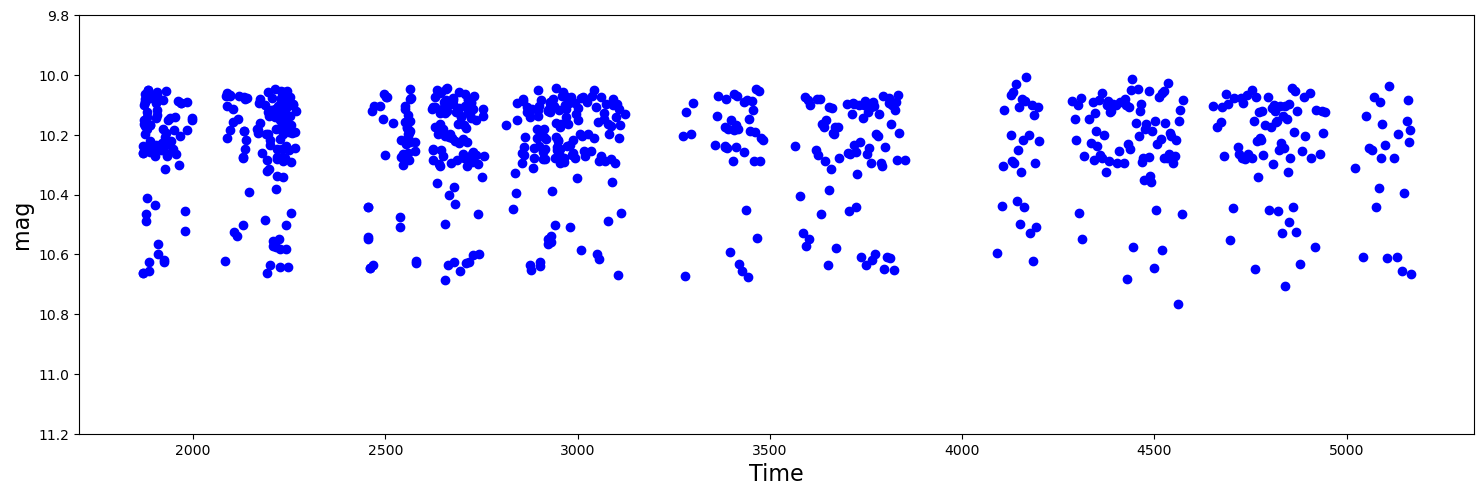

In [33]:
#make it a plot:
fig1, ax = plt.subplots(figsize=(18,6))
ax.plot(time_clean, mag_clean, color='blue', marker='o', linestyle='none')
ax.set_ylim(11.2, 9.8)

ax.set_box_aspect(0.3)
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("mag", fontsize=16)
plt.show()


In [37]:
# let's create a periodogram
from astropy.timeseries import LombScargle
#frequency, power = LombScargle(time_clean, mag_clean).autopower()
frequency = np.linspace(0.0,2.0,100)
power = LombScargle(time_clean, mag_clean).power(frequency)

# place the periodogram in a table
array = np.arange(2*len(power)).reshape(len(power), 2)
perio = Table(array, names=('freq','pow') )
perio['freq'] = frequency
perio['pow'] = power

# write the periodogram in a file
perio.write('var1_perio.txt',format='ascii',overwrite=True)

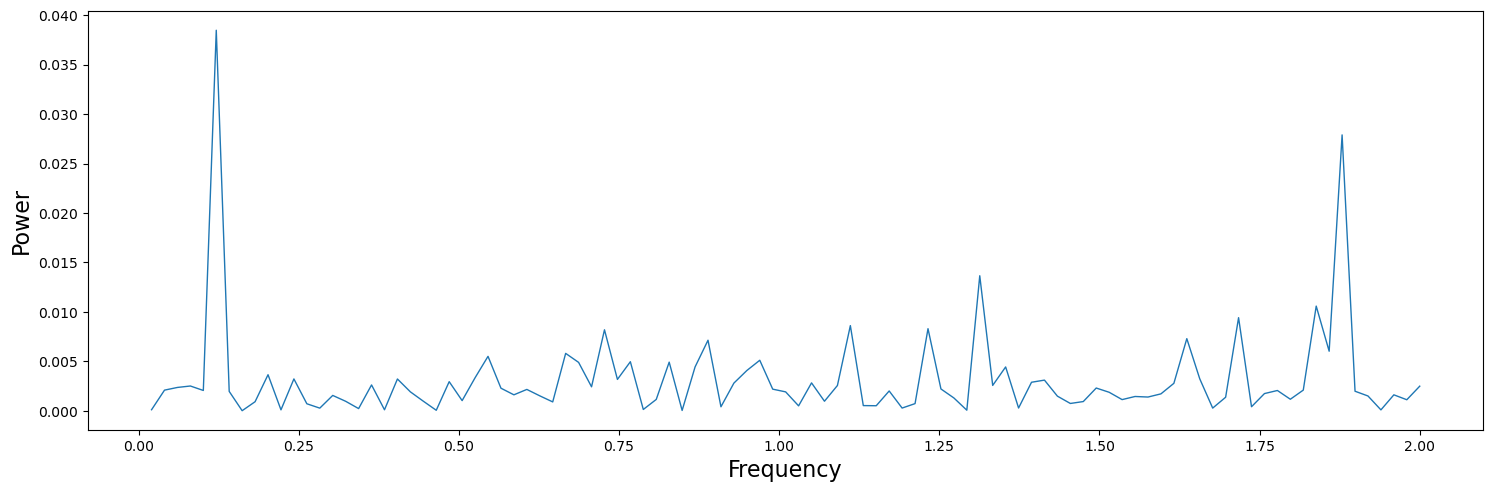

In [38]:
#make it a plot:

fig1, ax = plt.subplots(figsize=(18,6))
ax.plot(frequency, power, linewidth=1)
#ax.set_xlim(0.06, 0.1)

ax.set_box_aspect(0.3)
ax.set_xlabel("Frequency", fontsize=16)
ax.set_ylabel("Power", fontsize=16)
fig1.savefig("period.jpg",bbox_inches='tight')
plt.show()

In [39]:
max_p = max(power)
f = frequency[power.argmax()]
print(max_p, f)
T = 1/f
print(T)

nan 0.0
inf


C:\Users\antho\AppData\Local\Temp\ipykernel_28148\2363870647.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  T = 1/f


In [20]:
#frequency = np.linspace(0.0,2.0,1000)
#power = LombScargle(time_clean, mag_clean).power(frequency)

In [37]:
# calculating the phase
phase = time_clean / 14.14833
phase = phase - np.floor(phase)

# create a table with phase values
array = np.arange(2*len(phase)).reshape(len(phase), 2)
folded_lc = Table(array, names=('phase','mag') )
folded_lc['phase'] = phase
folded_lc['mag'] = mag_clean

# writing this new table into a file
folded_lc.write('var1_folded_lc.txt',format='ascii',overwrite=True)

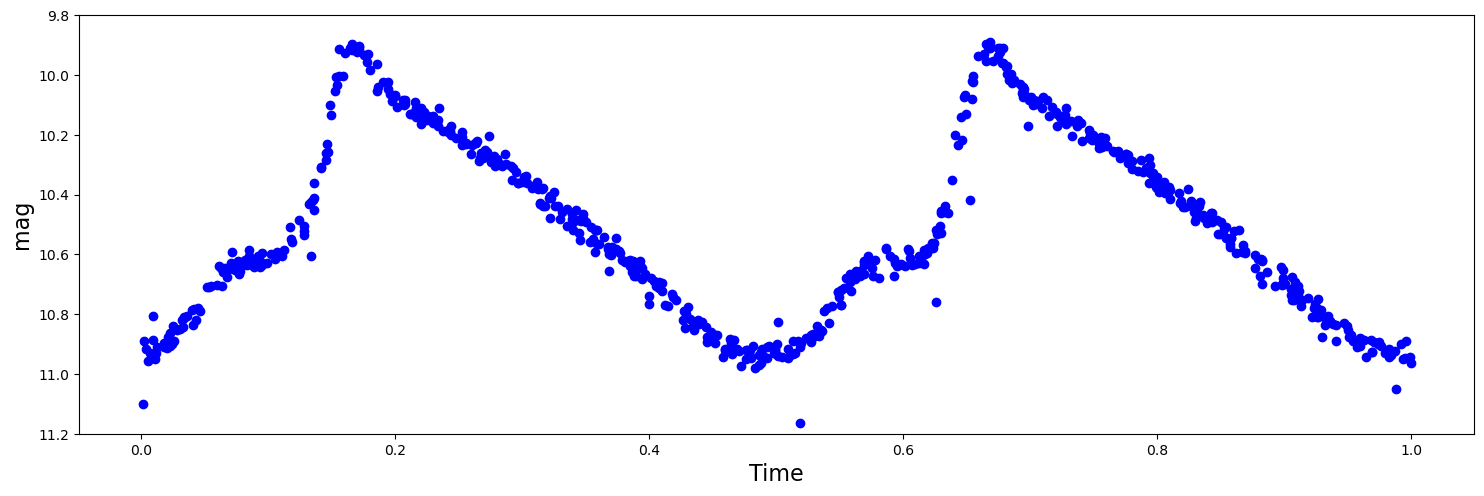

In [43]:
# calculating the phase
phase = time_clean / (14.14833 * 2.0)
phase = phase - np.floor(phase)

#make it a plot:
fig1, ax = plt.subplots(figsize=(18,6))
ax.plot(phase, mag_clean, color='blue', marker='o', linestyle='none')
ax.set_ylim(11.2, 9.8)
ax.set_box_aspect(0.3)
ax.set_xlabel("Time", fontsize=16)
ax.set_ylabel("mag", fontsize=16)
plt.show()

fig1.savefig("LS_Pup_phasefold.png",bbox_inches='tight')